<h1><center>cs1001.py , Tel Aviv University, Fall 2017-2018</center></h1>
<img src="http://www.pngall.com/wp-content/uploads/2016/05/Python-Logo-PNG-Image-180x180.png" width=50/>

# Recitation 7

We discussed memoization and demonstrated it using our recursive implementations for binom, change, and cnt_paths. Additionally, we solved an exam question about Catalan numbers which involves recursion, memoization, and complexity. Finally, we gave an intro to analysis of prime numbers and primality testing. We will continue this subject in the next recitation.

#### Takeaways:
- Memoization is mainly technical. Remember the main steps of defining an envelope function, deciding what keys you use to describe the input, 
and finally changing your recursive implementation so that it will search for the key in the dictionary before making the recursive calls, and save the key:value pair after obtaining the value for a certain input. 
- The keys of the dictionary should be chosen to represent the current input to the function in a one-to-one fashion.
- When analyzing the time complexity of a recursive function with memoization, consider the recursion tree and remember that a node that has already been computed will not have a subtree.

#### Code for printing several outputs in one cell (not part of the recitation):

In [2]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

# Recursion & Memoization

## Binom

The number of sets of size $k$ selected from a set of $n$ elements (with no repetitions)
Recursive formula (Pascal):
$\binom{n}{k} = \binom{n-1}{k} + \binom{n-1}{k-1}$
where the stopping criterion is $\binom{n}{0} = \binom{n}{n} = 1$

The time complexity of binom is exponential in $n$ (worst case behaviour is when $k=\frac{n}{2}$)

From previous class:

In [3]:
def binom(n,k):
    if n < 0 or k < 0 or n < k:
        return 0
    elif (k==0 or n==k):
        return 1
    return binom(n-1,k) + binom(n-1,k-1)

def binom_trace(n,k):
    result = binom_trace(n,k)
    return result

def binom_trace(n,k,indent=1):
    #indent = how much to indent the printouts
    if (k<0 or n<0 or n<k): # safety checks
        return 0
    elif (k==0 or k==n): # halting conditions
        print(">>"*indent + "({},{})".format(n,k))
        print("<<"*indent + "({},{})".format(n,k))
        return 1
    print(">>"*indent + "({},{})".format(n,k))
    indent+=1
    val = binom_trace(n-1,k,indent) + binom_trace(n-1,k-1,indent)
    indent-=1
    print("<<"*indent + "({},{})".format(n,k))
    return val

binom_trace(4,2)

>>(4,2)
>>>>(3,2)
>>>>>>(2,2)
<<<<<<(2,2)
>>>>>>(2,1)
>>>>>>>>(1,1)
<<<<<<<<(1,1)
>>>>>>>>(1,0)
<<<<<<<<(1,0)
<<<<<<(2,1)
<<<<(3,2)
>>>>(3,1)
>>>>>>(2,1)
>>>>>>>>(1,1)
<<<<<<<<(1,1)
>>>>>>>>(1,0)
<<<<<<<<(1,0)
<<<<<<(2,1)
>>>>>>(2,0)
<<<<<<(2,0)
<<<<(3,1)
<<(4,2)


6

Now with memoization:

In [3]:
def binom_fast(n,k):
    d = {}
    return binom_mem(n,k,d)

def binom_mem(n,k,mem):
    if n < 0 or k < 0 or n < k:
        return 0
    elif (k==0 or n==k):
        return 1
    if (n,k) not in mem:
        mem[(n,k)] = binom_mem(n-1,k, mem) + \
                    binom_mem(n-1,k-1, mem)
    return mem[(n,k)]

binom_fast(4,2)
binom_fast(50,25)

6

126410606437752

And now with the content of the dictionary: 

In [10]:
def binom_mem(n,k,mem):
    if n < 0 or k < 0 or n < k:
        return 0
    elif (k==0 or n==k):
        return 1
    
    if (n,k) not in mem:
        mem[(n,k)] = binom_mem(n-1,k, mem) + \
                    binom_mem(n-1,k-1, mem)
        print (n,k, mem)
    return mem[(n,k)]

binom_mem(4,2,{})

2 1 {(2, 1): 2}
3 2 {(2, 1): 2, (3, 2): 3}
3 1 {(2, 1): 2, (3, 2): 3, (3, 1): 3}
4 2 {(2, 1): 2, (3, 2): 3, (3, 1): 3, (4, 2): 6}


6

Printing the recursive calls, with memoization:

In [7]:
def binom_fast_trace(n,k):
    mem = dict()
    result = binom_mem_trace(n,k,mem)
    return result

def binom_mem_trace(n,k,mem,indent=1):
    #indent = how much to indent the printouts
    if (k<0 or n<0 or n<k): # safety checks
        return 0
    elif (k==0 or k==n): # halting conditions
        print(">>"*indent + "({},{})".format(n,k))
        print("<<"*indent + "({},{})".format(n,k))
        return 1
    print(">>"*indent + "({},{})".format(n,k))
    indent+=1
    if (n,k) not in mem:
        mem[(n,k)] = binom_mem_trace(n-1,k,mem,indent) + binom_mem_trace(n-1,k-1,mem,indent)
    indent-=1
    print("<<"*indent + "({},{})".format(n,k))
    return mem[(n,k)]


binom_fast_trace(4,2)

>>(4,2)
>>>>(3,2)
>>>>>>(2,2)
<<<<<<(2,2)
>>>>>>(2,1)
>>>>>>>>(1,1)
<<<<<<<<(1,1)
>>>>>>>>(1,0)
<<<<<<<<(1,0)
<<<<<<(2,1)
<<<<(3,2)
>>>>(3,1)
>>>>>>(2,1)
<<<<<<(2,1)
>>>>>>(2,0)
<<<<<<(2,0)
<<<<(3,1)
<<(4,2)


6

#### Analysis of binom_fast(n,k):

Time complexity = number of different visited cells \* number of visits per cell \* time per visit (not including recursive calls)

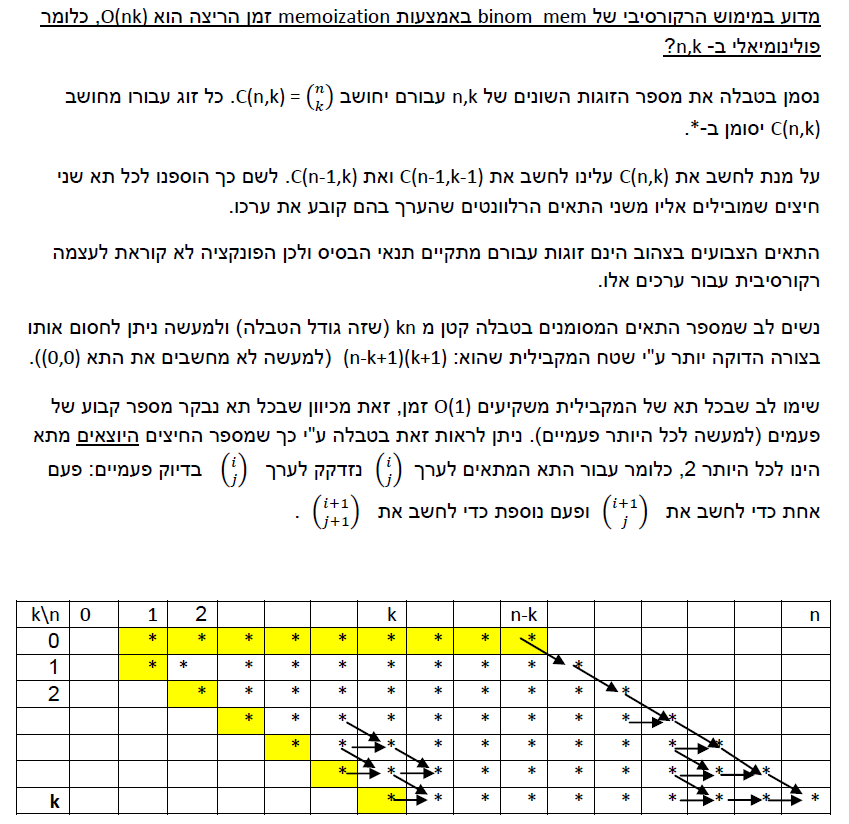

## Change problem

A bus driver needs to give an exact change and she has coins of limited types. She has infinite coins of each type.
Given the amount of change ($amount$) and the coin types (the list $coins$), how many ways are there? 

solution:
The requested value (denoted as $W(amount, coins)$) is equal to the number of ways to give the change when using coins of type $coins[-1]$ at least once plus the number of ways to give the change without using coins of type $coins[-1]$.
$W(amount, coins) = W(amount-coins[-1], coins) + W(amount, coins[:-1])$

stopping crtiteria:
- If $amount == 0$ return 1
- If $amount <0$ or $coins==[]$ return 0

This function change() below has an exponential time complexity.

From previous class:

In [4]:
def change(amount, coins):
    if amount == 0:
        return 1
    elif amount < 0 or coins == []:
        return 0
    return change(amount, coins[:-1]) +\
        change(amount - coins[-1], coins)

Now with memoization:

In [5]:
def change_fast(amount, coins):
    d = {}
    return change_mem(amount, coins, d)

def change_mem(amount, coins, d):
    if amount == 0:
        return 1
    elif amount < 0 or coins == []:
        return 0
    #if (amount, tuple(coins)) not in d:
    if (amount, len(coins)) not in d:
        #d[(amount, tuple(coins))] = \
        d[(amount, len(coins))] = \
            change_mem(amount, coins[:-1], d) +\
            change_mem(amount - coins[-1], coins, d)
    #return d[(amount, tuple(coins))]
    return d[(amount, len(coins))]

change_fast(500, [1,3,2])
        
        
    
    

21084

## Count paths

We solved question 2(b) from the 2015 fall semester exam (Moed B):
<img src="cnt_path_question.png">

From previous class:

In [6]:
def cnt_paths(L):
    if all_zeros(L):
        return 1
    
    result = 0
    for i in range(len(L)):
        if L[i] != 0:
            L[i] -= 1
            result += cnt_paths(L)
            L[i] += 1
    return result

def all_zeros(L):
    for i in L:
        if i != 0:
            return False
    return True

Now with memoization:

In [7]:
def cnt_paths_fast(L):
    d = {}
    return cnt_paths_mem(L,d)

def cnt_paths_mem(L,d):
    if all_zeros(L):
        return 1
    if tuple(L) not in d:
        result = 0
        for i in range(len(L)):
            if L[i] != 0:
                L[i] -= 1
                result += cnt_paths_mem(L, d)
                L[i] += 1
        d[tuple(L)] = result
    return d[tuple(L)]

def all_zeros(L):
    for i in L:
        if i != 0:
            return False
    return True

cnt_paths_fast([1,2])
cnt_paths_fast([1,2,80, 4, 7,6])

3

7486376454823865391082482192000

## Catalan numbers

We solved question 5 from the <a href="http://tau-cs1001-py.wdfiles.com/local--files/recitation-logs-2016b/m_catalan_exam_question.pdf"> 2015 spring semester exam (Moed B)</a>:

<img src="catalan.png">

#### An iterative implementation (section a):

In [ ]:
def catalan1(n):
    cat = [0]*(n+1)
    cat[0] = 1
    for i in range(1, n+1):
        #calculating C(i)
        for j in range(i):
            cat[i] += cat[j]*cat[i-j-1]

    
    return cat[n]
    
    
    
    

#### Complexity (section b):
We assume that arithmetic operations take constant time.

Let's consider the significant operations invelved in the function. First, it creates a list of size $n+1$, so that's $O(n)$ work. Then, it iterates through two loops, in a nested structure, where the inner loop is dependent on the outer loop. 
Using the tools we learned in class, we can analyze the number of iterations: $\sum_{i=1}^{n} i = O(n^2)$.

#### A recursive implementation with memoization (section c):

In [ ]:
def catalan2(n):
    d = dict()
    return catalan_rec(n,d)

def catalan_rec(n,d):
    if n==0:
        return 1
    
    if n not in d:
        result = 0
        for i in range(n):
            result += catalan_rec(i,d) * catalan_rec(n-i-1,d)
        d[n] = result
        
    return d[n]
        



#### Analysis of the recursive version:
The recursion depth is $O(n)$.

The tree will have a path of length $O(n)$, and every inner node along this path (including the root), solving a problem of size $i$, will have $(2*i-1)$ other child nodes that are leaves (among its $2*i$ child nodes).

Note that in every node, where we solve a problem of size $i$, we spend $O(i)$ time not including the recursive calls. Thus, the overall time complexity is $O(n^2)$.

# Intro to primes

Fermat's little theorem: if $p$ is prime and $1 < a < p$, then $a^{p-1} (\textrm{mod}\ p) \equiv 1$

Equivalently: if $m$ is not a prime then there exists $1 < a < p$ such that $a^{p-1} (\textrm{mod}\ p) \not\equiv 1$. Such a number $a$ is called a witness to the fact that $m$ is not prime.

We can use Fermat's little theorem in order test whether a given number is prime. Note that if the number has $n$ bits than testing all possible $a$s will require $O(2^n)$ iterations (a lot!).

Instead, we will try 100 random $a$s in the range and see if one works as a witness.

### Primality test using Ferma's witness

In [ ]:
import random

def is_prime(m, show_witness=False):

    """ probabilistic test for m's compositeness """

    for i in range(0,100):
        a = random.randint(1,m-1) # a is a random integer in [1..m-1]
        if pow(a,m-1,m) != 1:
            if show_witness:  # caller wishes to see a witness
                print(m,"is composite","\n",a,"is a witness, i=",i+1)
            return False

    return True